# Trouver des fichiers Json sur Github

In [ ]:
link = "https://raw.githubusercontent.com/HOUDZZZ/project3/main/parcours-des-lignes-de-bus-du-reseau-star.json"
# j'avais téléchargé le fichier sur mon github du coup pas besoin de l'uploadé comme j'avais fait sur les autres fichiers 
#Le fichier ne contient pas de donnees en temps réels il montre juste combien il y a de bus et leurs trajet

In [18]:
from google.colab import files
import numpy as np
import random 
import folium
import pandas as pd

trajet_bus=pd.read_json('https://raw.githubusercontent.com/HOUDZZZ/project3/main/parcours-des-lignes-de-bus-du-reseau-star.json')
trajet_bus_fields=pd.json_normalize(data=trajet_bus['fields'])


trajet_bus_fields["coordinates_reversed"]=np.empty((len(trajet_bus_fields), 0)).tolist()








In [19]:
# petite ligne de codes pour savoir combien on a de bus
Bus_principaux= trajet_bus_fields[trajet_bus_fields["type"]== "Principal"]
Bus_principaux["idligne"].nunique()

157

In [ ]:
# sur mon fichier les coordonnées pour générer les polylines sont inversées donc ici je crée une nouvelles colonne avec les coordonnées inversées 
#pour pouvoir les utiliser avec folium (pout créer les polylines sur la map)
for index, row in trajet_bus_fields.iterrows():
    for group in row["parcours.coordinates"]:
         row["coordinates_reversed"].append(list(reversed(group)))
trajet_bus_fields
# petite ligne de code pour vérifier que tout s'est bien passé en terme d'inversion des coordonnées
trajet_bus_fields.loc[0,"coordinates_reversed"]

In [29]:
#des verifications
allers_retours= trajet_bus_fields.groupby(["nomcourtligne","senscommercial"]).agg({"libellelong": "count", "code": "count"}).sort_values(by="libellelong", ascending= False)
allers_retours= allers_retours.reset_index()

In [42]:
#enlever les lignes inutiles , je n'ai besoin que d'une ligne par bus donc je crée une dataframe appelée unique bus qui ne contient qu'une ligne par bus
unique_bus = trajet_bus_fields.drop_duplicates(subset=['nomcourtligne'])
unique_bus

sens              code        type  \
0       1  0052-B-3732-1553  Secondaire   
1       1  0054-B-2502-1567  Secondaire   
2       0  0059-A-1564-2372   Principal   
3       1  0061-B-4351-1510   Principal   
4       0  0062-A-1649-2601   Principal   
..    ...               ...         ...   
475     0  0491-A-1569-3764   Principal   
502     0  0243-A-2841-3122   Principal   
513     0  0441-A-4064-3162   Principal   
515     0  0451-A-3826-4381   Principal   
517     0  0453-A-4381-4705   Principal   

                                  geo_point_2d senscommercial idligne  \
0      [48.13871923632483, -1.772999421489592]         Retour    0052   
1    [48.103633105602306, -1.7392232115537771]         Retour    0054   
2     [48.04945238934427, -1.7172134471546672]          Aller    0059   
3     [48.049294613512025, -1.662362046563783]         Retour    0061   
4      [48.06286069535671, -1.621188486139801]          Aller    0062   
..                                         ...            ...     ...   
475   [48.118316203213396, -1.733061669210238]          Aller    0491   
502   [48.152668442694896, -1.733579286152038]          Aller    0243   
513  [48.156223574314396, -1.7313303806325742]          Aller    0441   
515   [48.00010788276778, -1.6471883414377202]          Aller    0451   
517    [47.97258730571654, -1.670108466132021]          Aller    0453   

                                           libellelong idarretarrivee  \
0    Saint-Gilles (Ile des Bois) -> Rennes (Villeje...           1553   
1    Le Rheu (Lycée Monod) -> Rennes (Charles de Ga...           1567   
2          Rennes (Henri Fréville) -> Bruz (Bruz Gare)           2372   
3    Saint-Erblon (Parc d'Activités) -> Noyal-Châti...           1510   
4    Rennes (La Poterie) -> Vern-sur-Seiche (Croix ...           2601   
..                                                 ...            ...   
475  Rennes (Collège Rosa-Parks) -> Vezin-le-Coquet...           3764   
502  Saint-Grégoire (Jean-Paul II) -> Pacé (Pie Neuve)           3122   
513  La Chapelle-des-Fougeretz (Izé) -> Pacé (Centr...           3162   
515  Bourgbarré (Les Cruaux) -> Orgères -> Saint-Er...           4381   
517  Saint-Erblon (Collège Saint-Paul) -> Laillé (L...           4705   

                   id      nomarretdepart idarretdepart estaccessiblepmr  \
0    0052-B-3732-1553        Ile des Bois          3732             True   
1    0054-B-2502-1567         Lycée Monod          2502             True   
2    0059-A-1564-2372      Henri Fréville          1564             True   
3    0061-B-4351-1510    Parc d'Activités          4351             True   
4    0062-A-1649-2601          La Poterie          1649             True   
..                ...                 ...           ...              ...   
475  0491-A-1569-3764  Collège Rosa-Parks          1569            False   
502  0243-A-2841-3122        Jean-Paul II          2841            False   
513  0441-A-4064-3162                 Izé          4064            False   
515  0451-A-3826-4381          Les Cruaux          3826            False   
517  0453-A-4381-4705  Collège Saint-Paul          4381            False   

    nomcourtligne       nomarretarrivee  longueur couleurtrace  \
0              52  Villejean-Université   14009.3      #00893e   
1              54     Charles de Gaulle   12143.8      #ba65a5   
2              59             Bruz Gare   14331.0      #ef859d   
3              61        Henri Fréville   12185.9      #e4003a   
4              62         Croix Malinge    8022.0      #004f9e   
..            ...                   ...       ...          ...   
475          Ts91                Vallée    5529.6      #b269ab   
502           243             Pie Neuve   10613.7      #f7941d   
513          Ts41  Centre scolaire Pacé   13957.0      #f39200   
515          Ts51    Collège Saint-Paul   10678.1      #009fe3   
517          Ts53         Laillé Eglise   28982.4      #e30613   

                            

In [32]:
#création de la map
mapish= folium.Map(location = [48.102018, -1.674523],tiles= "Stamen Terrain", zoom_start=12,control_scale= True) 

In [43]:
# cette cellule n'est pas requise mais je la garde parceque le code est intéressant cela permet de créer une nouvelle colonnes contenant des couleurs pour attribuer une couleur au hasard à chaque ligne de bus
radish_colors= ['red', 'blue', 'green', 'purple', 'orange', 'darkred','lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
unique_bus= trajet_bus_fields.drop_duplicates(subset='nomcourtligne')
unique_bus["couleur_radis_moche"]= pd.cut(unique_bus["longueur"], bins= len(radish_colors), labels= radish_colors)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
#selection de 10 bus (les plus fréquentés) à mettre sur ma map
quelqueBus=unique_bus[(unique_bus["nomcourtligne"]== "C1")|(unique_bus["nomcourtligne"]== "C4")|(unique_bus["nomcourtligne"]== "C5")|(unique_bus["nomcourtligne"]== "40")|(unique_bus["nomcourtligne"]== "9")|(unique_bus["nomcourtligne"]== "50")|(unique_bus["nomcourtligne"]== "C3")|(unique_bus["nomcourtligne"]== "11")|(unique_bus["nomcourtligne"]== "C2")|(unique_bus["nomcourtligne"]== "C6")]
quelqueBus["nomcourtligne"].unique()

array(['C4', 'C6', '9', '50', 'C1', 'C2', '11', 'C3', 'C5', '40'],
      dtype=object)

In [45]:
# fonction qui va me permettre d"ajouter une colonne couleur à chaque ligne de bus, qui va être utilisée pour colorer les polylines
def couleur_bus(x):
  if x == "C1":
    return "lightgreen"
  if x== "C4":
    return "purple"
  if x== "C5":
    return "orange"
  if x== "40":
    return "yellow"
  if x == "9":
    return "blue"
  if x== "50":
    return "royalblue"
  if x== "C2":
    return "lightskyblue"
  if x== "11":
    return "palevioletred"
  if x== "C3":
    return "limegreen"
  if x== "C6":
    return "turquoise"
  
  

quelqueBus["couleur_bus"]= quelqueBus["nomcourtligne"].apply(couleur_bus)
quelqueBus["couleur_bus"].nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


10

In [46]:
#création des polylines pour les bus 
for index, row in quelqueBus.iterrows():
    popup = row["nomcourtligne"]
    my_PolyLine=folium.PolyLine(locations=row["coordinates_reversed"],weight=10, popup = popup, color= row["couleur_bus"])
    mapish.add_child(my_PolyLine)



In [47]:
#création des points de chaque arrêts qui seront affichés sur les polylines
for index, row in quelqueBus.iterrows():
  for point in row["coordinates_reversed"]:
      stop_points_marker = folium.CircleMarker(
                        location = point,
                        fill_opacity = 1,
                        color = 'grey',
                        fill_color = 'white',
                        weight= 1, 
                        radius = 2,
                        tileSize = 1
                    ).add_to(mapish)
  

In [ ]:
quelqueBus.loc[52,"coordinates_reversed"]

les codes folium Marker ci dessous sont utilisés pour ajouter les photos des lignes de bus au départ et au terminus de chaque bus 

In [ ]:
#j'upload le logo de chaque bus 
files.upload()

In [52]:
folium.Marker(location = [48.087599, -1.643465],icon = folium.features.CustomIcon('11.jpeg', icon_size=(25, 25))).add_to(mapish)

In [53]:
folium.Marker(location = [48.107385, -1.7391519999999998],icon = folium.features.CustomIcon('11.jpeg', icon_size=(25, 25))).add_to(mapish)

In [54]:
folium.Marker(location = [48.159827, -1.692066],icon = folium.features.CustomIcon('C2.png', icon_size=(25, 25))).add_to(mapish)

In [55]:
folium.Marker(location = [48.109524, -1.677822],icon = folium.features.CustomIcon('C2.png', icon_size=(25, 25))).add_to(mapish)

In [56]:
folium.Marker(location = [48.113611, -1.590471],icon = folium.features.CustomIcon('C6.png', icon_size=(25, 25))).add_to(mapish)

In [57]:
folium.Marker(location = [48.068013, -1.726887],icon = folium.features.CustomIcon('C6.png', icon_size=(25, 25))).add_to(mapish)

In [58]:
folium.Marker(location = [48.155188, -1.573236],icon = folium.features.CustomIcon('50.png', icon_size=(25, 25))).add_to(mapish)

In [59]:
folium.Marker(location = [48.109697, -1.678223],icon = folium.features.CustomIcon('50.png', icon_size=(25, 25))).add_to(mapish)

In [60]:
folium.Marker(location = [48.138431, -1.659187],icon = folium.features.CustomIcon('9.png', icon_size=(25, 25))).add_to(mapish)
folium.Marker(location = [48.104133, -1.713395],icon = folium.features.CustomIcon('9.png', icon_size=(25, 25))).add_to(mapish)

In [61]:
folium.Marker(location = [48.109857, -1.678812],icon = folium.features.CustomIcon('40.png', icon_size=(25, 25))).add_to(mapish)
folium.Marker(location = [48.124652, -1.63327],icon = folium.features.CustomIcon('40.png', icon_size=(25, 25))).add_to(mapish)

In [62]:
folium.Marker(location = [48.13471, -1.6217869999999999],icon = folium.features.CustomIcon('C1.jpeg', icon_size=(25, 25))).add_to(mapish)
folium.Marker(location = [48.109979, -1.680191],icon = folium.features.CustomIcon('C1.jpeg', icon_size=(25, 25))).add_to(mapish)

In [63]:
folium.Marker(location = [48.132622, -1.6362700000000001],icon = folium.features.CustomIcon('C4.jpeg', icon_size=(25, 25))).add_to(mapish)
folium.Marker(location = [48.135801, -1.692974],icon = folium.features.CustomIcon('C4.jpeg', icon_size=(25, 25))).add_to(mapish)

In [64]:
folium.Marker(location = [48.138785, -1.66595],icon = folium.features.CustomIcon('C5.jpeg', icon_size=(25, 25))).add_to(mapish)
folium.Marker(location =  [48.084079, -1.692138],icon = folium.features.CustomIcon('C5.jpeg', icon_size=(25, 25))).add_to(mapish)

In [65]:
folium.Marker(location = [48.087822, -1.674597],icon = folium.features.CustomIcon('C3.png', icon_size=(25, 25))).add_to(mapish)
folium.Marker(location =  [48.138751, -1.659115],icon = folium.features.CustomIcon('C3.png', icon_size=(25, 25))).add_to(mapish)

In [66]:
48.0686257,-1.7253652

(48.0686257, -1.7253652)

In [67]:
folium.Marker(location =  [48.0686257,-1.7253652],icon = folium.features.CustomIcon('Aeroport.png', icon_size=(40, 40))).add_to(mapish)

In [68]:
quelqueBus.loc[110,"coordinates_reversed"]

[[48.087822, -1.674597],
 [48.087919, -1.674594],
 [48.088076, -1.6745],
 [48.088684, -1.674483],
 [48.088719, -1.674513],
 [48.088737, -1.67456],
 [48.088748, -1.6746159999999999],
 [48.088748, -1.674667],
 [48.088742, -1.674715],
 [48.088727, -1.674752],
 [48.088698, -1.674789],
 [48.088637, -1.674836],
 [48.088498, -1.6749049999999999],
 [48.088414, -1.674961],
 [48.087762, -1.6749839999999998],
 [48.086736, -1.675006],
 [48.086622, -1.675024],
 [48.085599, -1.675062],
 [48.085557, -1.675408],
 [48.085496, -1.6765569999999999],
 [48.08547, -1.676675],
 [48.08541, -1.676762],
 [48.085336, -1.676802],
 [48.084103, -1.676863],
 [48.084006, -1.67691],
 [48.083954, -1.676911],
 [48.083955, -1.6769349999999998],
 [48.08395, -1.6769729999999998],
 [48.083938, -1.677009],
 [48.083921, -1.677038],
 [48.083899, -1.6770610000000001],
 [48.083884, -1.677068],
 [48.083924, -1.677311],
 [48.084012, -1.677552],
 [48.084033, -1.677616],
 [48.084045, -1.677712],
 [48.084037, -1.678628],
 [48.084078,


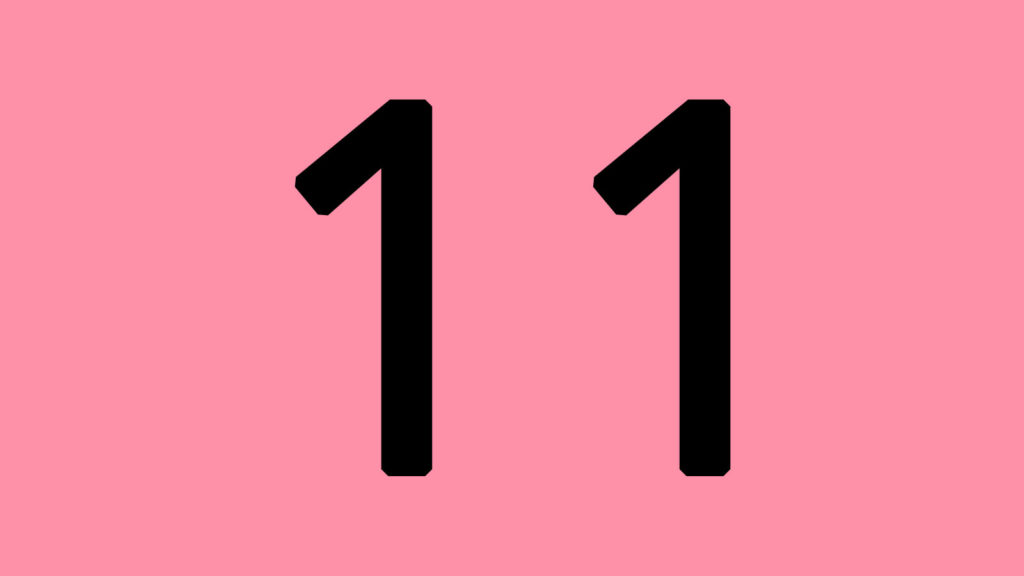
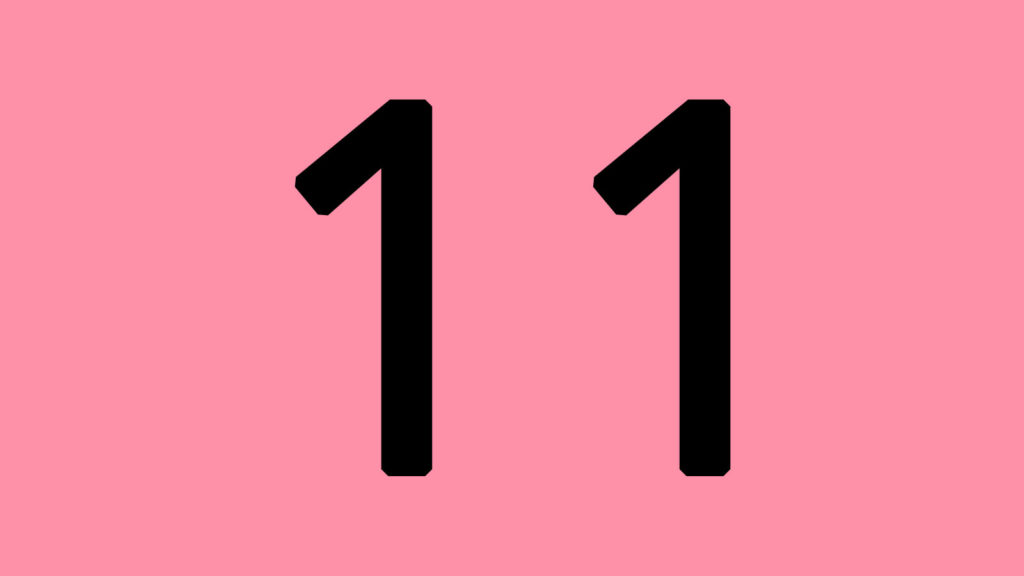
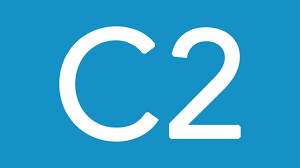
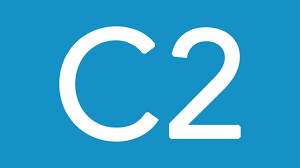
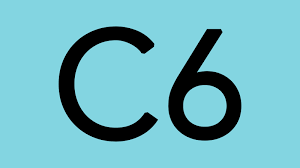
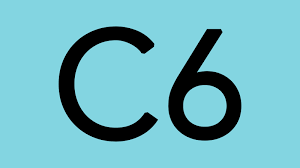
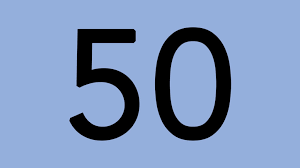
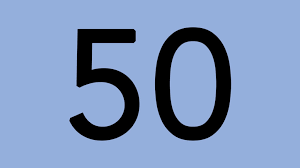
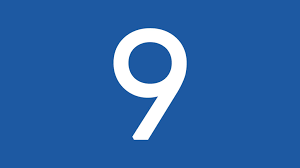
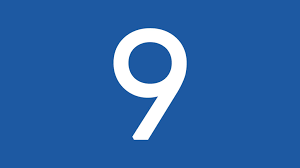
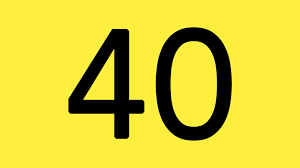
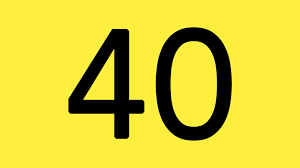
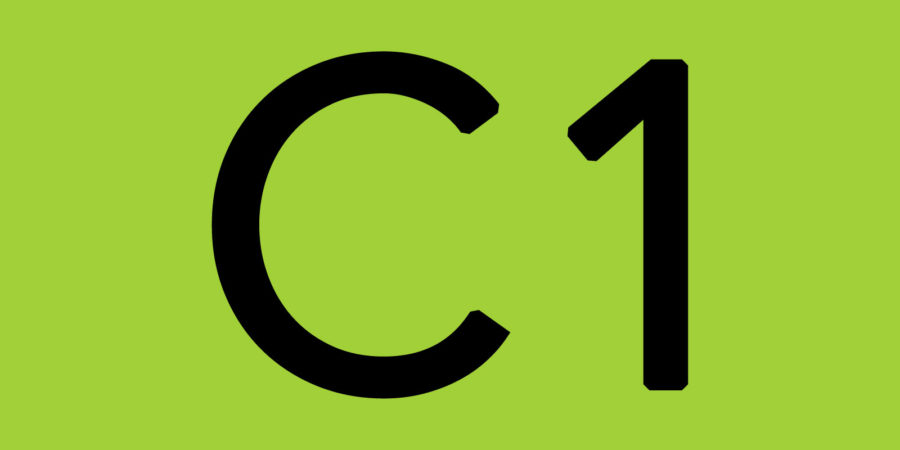
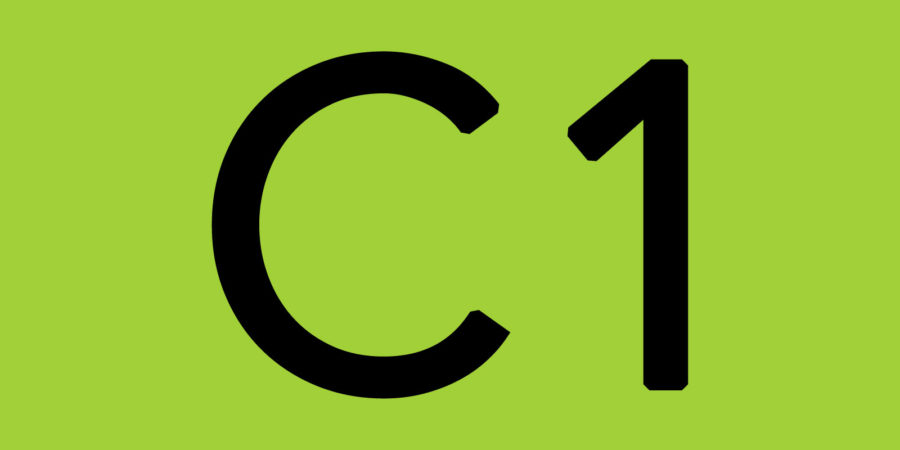
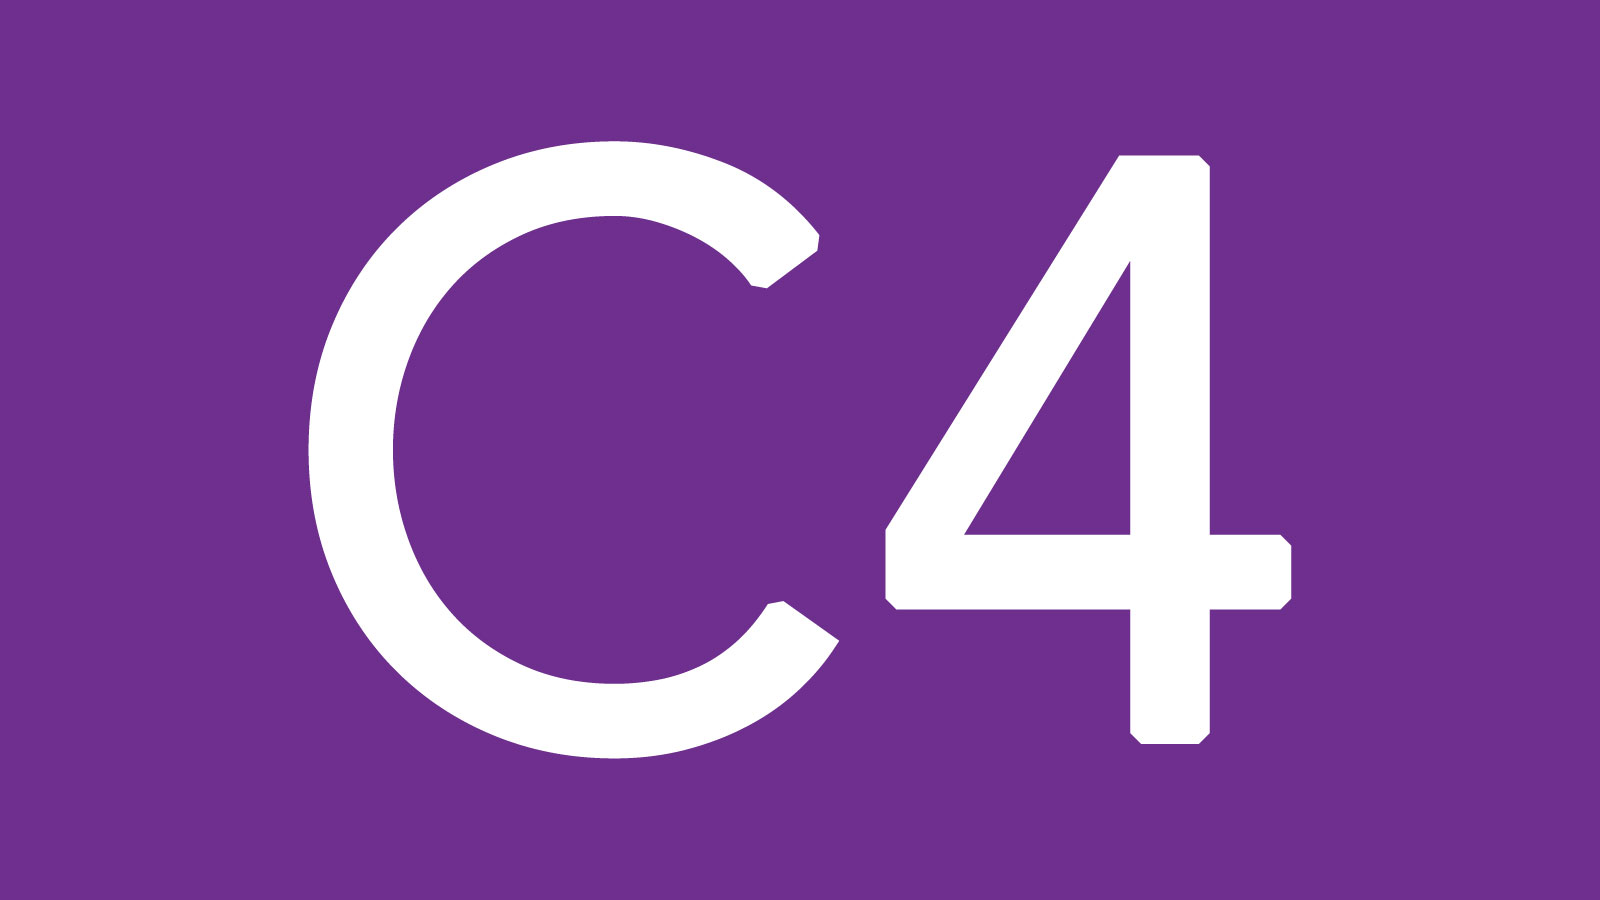
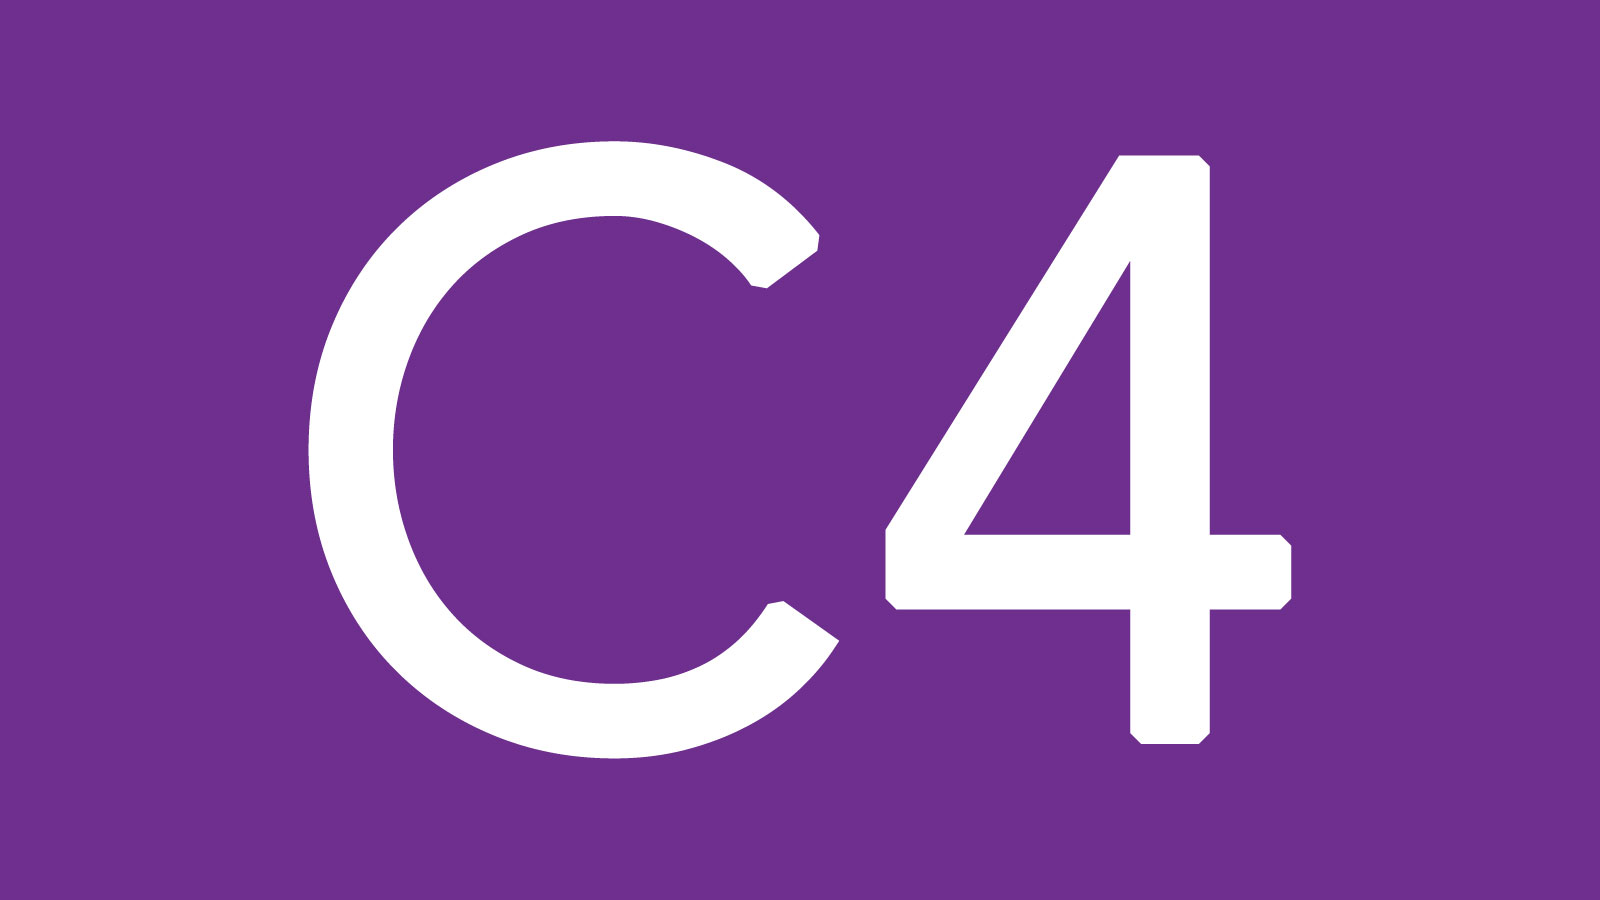
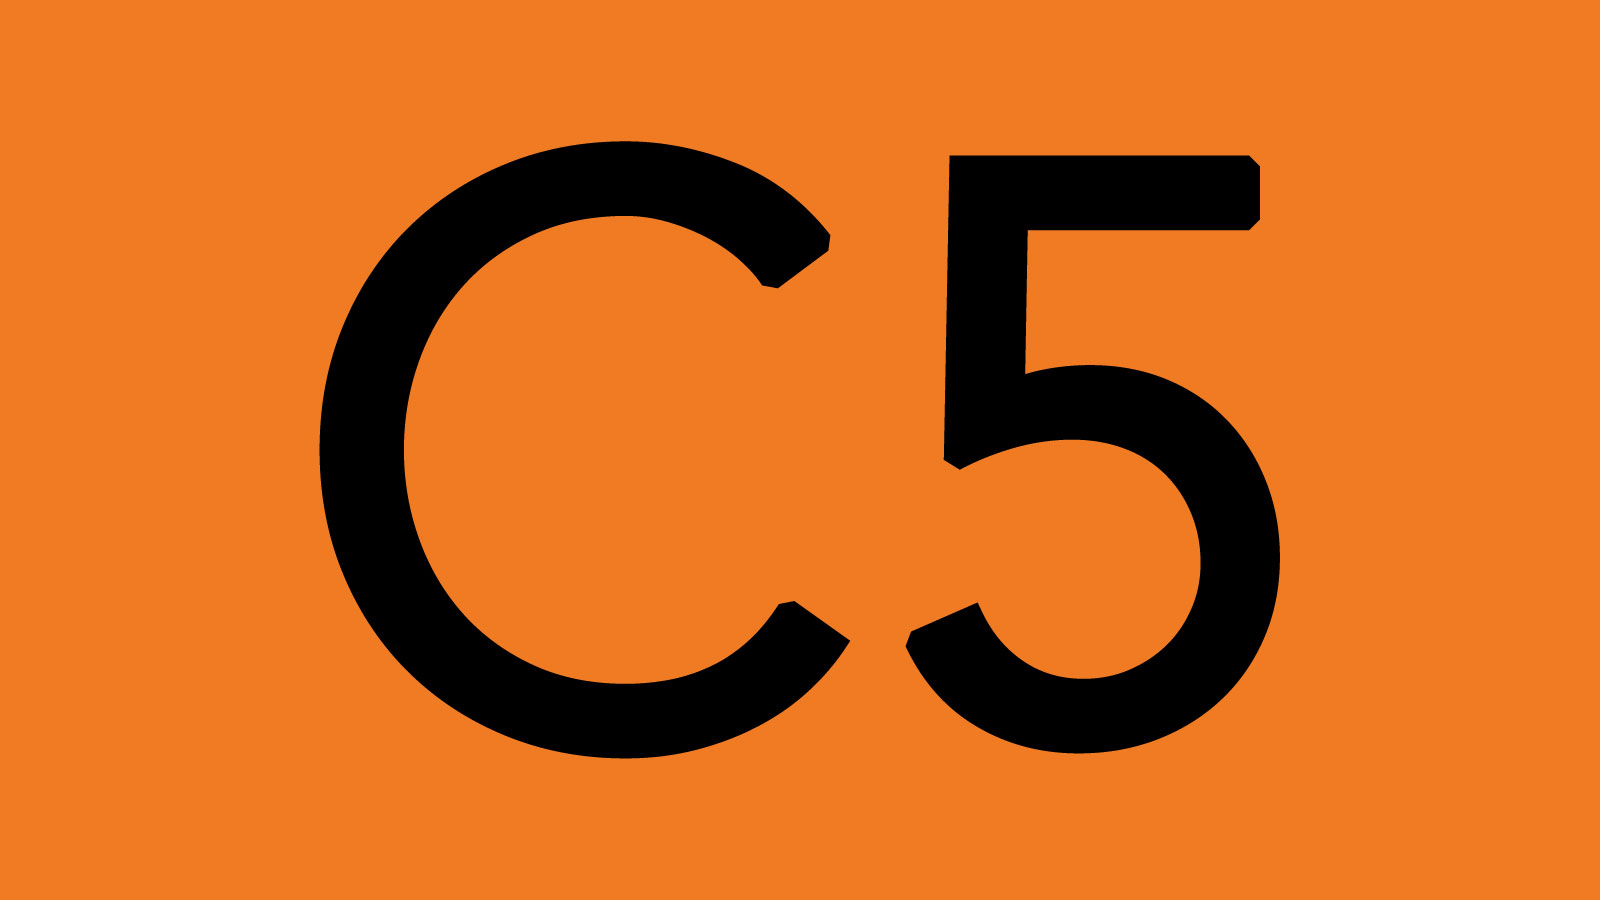
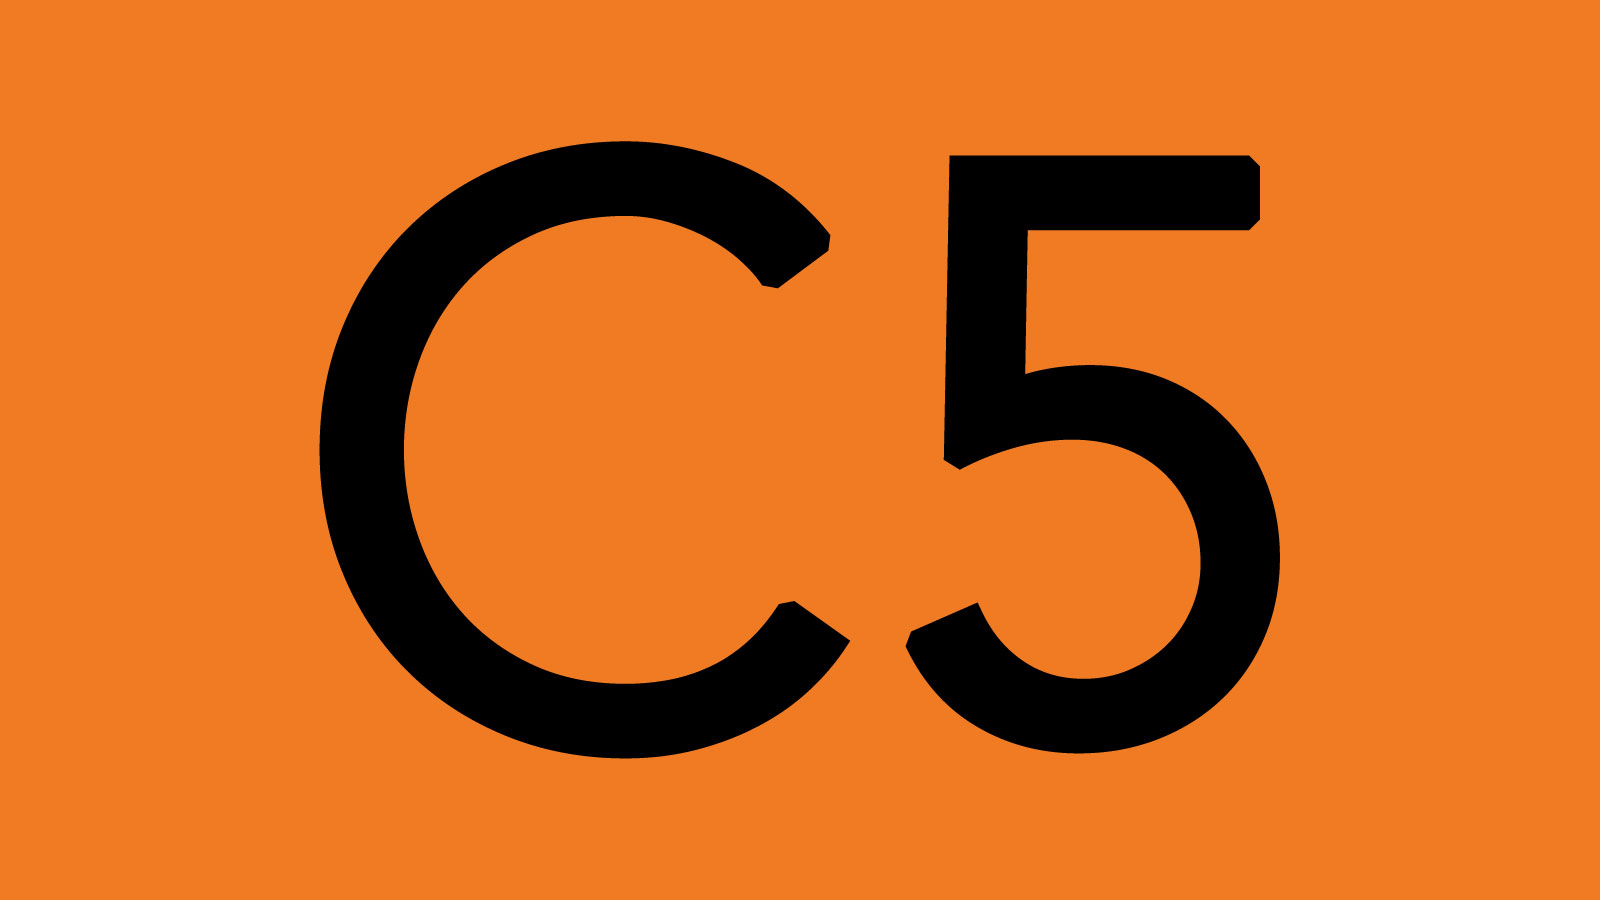
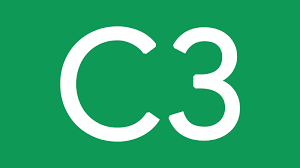
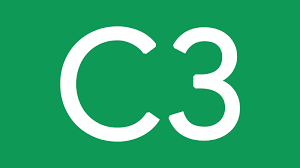
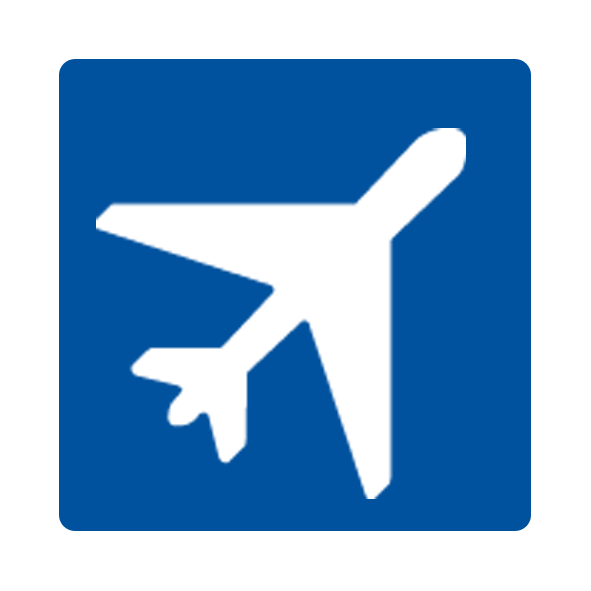

In [70]:
mapish

In [71]:
mapish.save(outfile='map.html')